## Video Annotation Questionnaire
 

### How would you rate your understanding of the video? 
-  less than 60% 
-   70% 
-  80% 
-   90% 
-  100%
<b>
    
### How much of the information in the video can you remember?
-  less than 60% 
-  70% 
-  80% 
-  90% 
-  100%

    
### Estimate the number of words you missed or did not understand. 

    
-  more than 10 words
-  6-10 words.
-  3-5 words.
-  1-2 words.
-  none.


### The speech rate was...

-  fast 
-  somewhat fast 
-  neither fast nor slow 
-  somewhat slow 
-  slow



### I believe the video is…

-  much higher than my language ability 
-  higher than my language ability
-  neither high nor low 
-  lower than my language ability
-  much lower than my l language ability.



## Validity and Reliability Analysis


To check the internal consistently of the instrument items, I performed correlation analyses on all possible pairs among the five questions using the entire dataset. The results showed that all five questions significant correlated with Pearson values ranging from r = 0.34 to 0.80, p < .01. The strong inter-correlations among the questions suggest that one construct is being measured: videotext difficulty. Therefore, I summed each participant’s responses to the five questions to make one single composite score of videotext complexity (ranging from 5 to 25). Then the composites scores for all annotators were averaged to form a single absolute complexity score for each videotext. 
The reliability analysis showed that the instrument items appeared to have good internal consistency (α = .81). Post hoc analysis on the entire dataset indicated the instrument item had an even higher reliability (items 2826; α = .86)

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

sns.set_style('darkgrid')
# sns.set(style="white")

# import openpyxl
from sklearn.model_selection import train_test_split
from sklearn import linear_model
# Plot inline in notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Loading Rating Data

In [23]:
# Load data from csv file
df = pd.read_csv('exploration.csv')
meta_data = pd.read_csv('corpus_master_list.csv')

#  y =complexity score
y = df['Complexity_Score']

#  y_GA and y_AL in two serise
y_GA = y[:320].apply(int)
y_AL = y[320:].apply(int)

#  y_GA and y_AL in two df
y_GA_df = pd.DataFrame(data=y[:320], dtype=np.int8)
y_AL_df = pd.DataFrame(data=y[320:], dtype=np.int8)

Code = df['Code']
 
y_df =df[['Code', 'Group', 'Complexity_Score']].copy()

I used YouTube API v3 to retrieve all relevant information about the videos, e.g., video title, author, year, video ids, and channel name. I manually checked each videotext for their topic and production style. I adopted a taxonomy proposed by Crook and Schofield (2017) for classifying video production style. For indexing and retrieving purposes, I provided unique identifiers for all videos which are composed of two letters (GA for Government Advisement and AL for Academic Lecture) and a serial number (e.g., GA5 and AL5). After retrieving all relevant information, each video in the initial database has the following metadata, Video ID, URL, Title, Author, Subject, Topic, Type of Copyright License, and Video Production Style

In [30]:
meta_data.head()

,Id,Code,publishedAt,title,channelTitle,youtube_Category,my_category,Topic,Title,URL,By,Copyrights,style,Complexity_Score
0,Z_P5rqxeBVA,AL.165,2013-08-20T18:16:25.000Z,The Agricultural Revolution | World history | ...,Khan Academy Partners,Education,History,World history,The Agricultural Revolution | World history | ...,https://www.youtube.com/watch?v=qZ_P5rqxeBVA,Khan Academy,Creative Commons Attribution license (reuse al...,D3 + illustration/animation,19.0
1,73yFDlgqPio,AL.166,2013-08-20T19:42:01.000Z,Indus Valley civilization | World history | Kh...,Khan Academy Partners,Education,History,World history,Indus Valley civilization | World history | Kh...,https://www.youtube.com/watch?v=q73yFDlgqPio,Khan Academy,Creative Commons Attribution license (reuse al...,D3 + illustration/animation,14.0
2,EUGCai8y2Uw,AL.167,2013-08-20T20:28:59.000Z,Ancient Mesopotamia | World history | Khan Aca...,Khan Academy Partners,Education,History,World history,Ancient Mesopotamia | World history | Khan Aca...,https://www.youtube.com/watch?v=qEUGCai8y2Uw,Khan Academy,Creative Commons Attribution license (reuse al...,D3 + illustration/animation,18.0
3,Hpfs8uEo9WA,AL.168,2013-08-20T21:25:23.000Z,Ancient Egypt | World history | Khan Academy,Khan Academy Partners,Education,History,World history,Ancient Egypt | World history | Khan Academy,https://www.youtube.com/watch?v=qHpfs8uEo9WA,Khan Academy,Creative Commons Attribution license (reuse al...,D3 + illustration/animation,22.0
4,7HUYGoJ2bD0,AL.169,2013-08-20T22:19:15.000Z,Greeks and Persians | World history | Khan Aca...,Khan Academy Partners,Education,History,World history,Greeks and Persians | World history | Khan Aca...,https://www.youtube.com/watch?v=q7HUYGoJ2bD0,Khan Academy,Creative Commons Attribution license (reuse al...,D3 + illustration/animation,16.0


## Descriptive Stats

In [26]:
grouped = y_df.groupby('Group')
grouped.describe()

Complexity_Score                                                   
                 count       mean       std  min   25%   50%    75%   max
Group                                                                    
AL               320.0  17.012500  3.684225  7.0  15.0  18.0  20.00  23.0
GA               320.0  16.759375  3.380041  8.0  14.0  17.0  19.25  24.0

### Exploratory Analysis on all Videos 

count    640.000000
mean      16.885938
std        3.534908
min        7.000000
25%       15.000000
50%       17.000000
75%       20.000000
max       24.000000
Name: Complexity_Score, dtype: float64


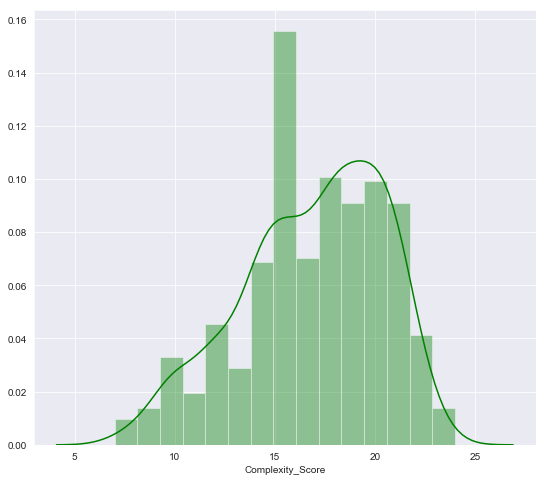

In [27]:

print(y_df['Complexity_Score'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(y_df['Complexity_Score'], color='g', bins=15, hist_kws={'alpha': 0.4});


### Skewness and Kurtosis

In [6]:
# skewness and kurtosis
print("skeweness is %f" % y.skew())
print("Kurtosis is %f" % y.kurt())

skeweness is -0.491660
Kurtosis is -0.481434


### Acadmic Lecture Difficulty vs Goverment Advertisment Difficulty 

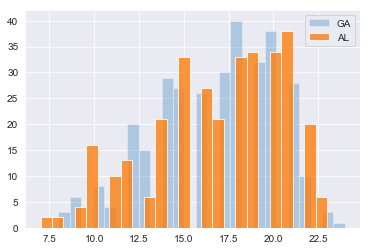

In [7]:

pyplot.hist(y_GA, bins=25, alpha=0.3, label='GA')
pyplot.hist(y_AL, bins=25, alpha=0.8, label='AL')
pyplot.legend(loc='upper right')
pyplot.show()

###  Number of videos per difficulty score 

In [8]:
y_ValueCounts = y.value_counts()
print (y_ValueCounts)

18    73
20    72
21    66
19    66
15    60
16    53
17    51
14    50
12    33
22    30
10    24
13    21
11    14
9     10
23     9
8      5
7      2
24     1
Name: Complexity_Score, dtype: int64


### Split Videos in four bins based on y

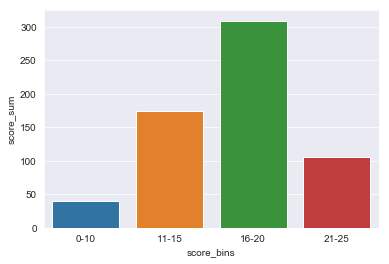

In [9]:
# create four bins 
score_sum = df.loc[df['score_sum'].notnull(), 'score_sum'] = df.loc[df['score_sum'].notnull(), 'score_sum'].apply(int)
sns.barplot(x="score_bins", y="score_sum", data=df)

In [28]:
df.groupby('score_bins')['score_sum'].value_counts()

score_bins  score_sum
0-10        40.0         1
11-15       175.0        1
16-20       309.0        1
21-25       106.0        1
Name: score_sum, dtype: int64

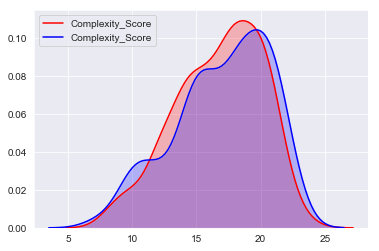

In [97]:
p1=sns.kdeplot(y_GA, shade=True, color="r")
p1=sns.kdeplot(y_AL, shade=True, color="b")
#sns.plt.show()


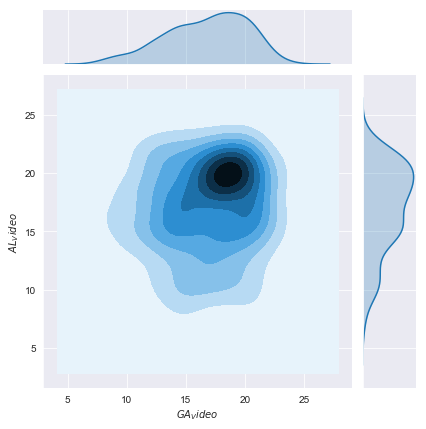

In [36]:
# Kernel density estimation

g = sns.jointplot(x= y_GA, y= y_AL, data=df, kind="kde");
g.set_axis_labels("$GA_Video$", "$AL_Video $");

###   Caculating Quartiles

In [10]:
sorted(y)
q3, median, q1 = np.percentile(y, [75,50,25])
mean = int(y.mean())


# y_q75 = [x for x in Score.groupby(Score['Complexity_Score'] <= q75)]
# median = [x for _, x in Score.groupby(Score['Complexity_Score'] <= median)]
# q25 = [x for _, x in Score.groupby(Score['Complexity_Score'] <= q25)]
# above_mean = [x for _, x in Score.groupby(Score['Complexity_Score'] >= mean)]
# below_mean = [x for _, x in Score.groupby(Score['Complexity_Score'] <= mean)]

### Detecting Outliers

(638, 3)

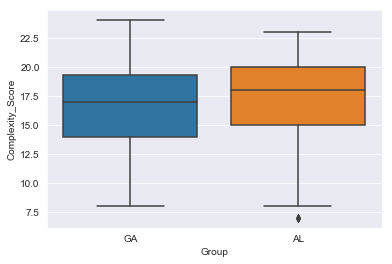

In [11]:

#  ploting y w outliers
ax = sns.boxplot(x="Group", y="Complexity_Score", data=df)

# Caculating interquartile range (IQR)
IQR = q3 - q1
IQR_y = (y < (q1 - 1.5 * IQR)) | (y > (q3 + 1.5 * IQR))
y_no_outlier = y_df[~((y < (q1 - 1.5 * IQR)) |(y > (q3 + 1.5 * IQR)))]

#  two points are outliers 
y_no_outlier.shape


Wikipedia Definition: 
The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.

### Deleting outliers 

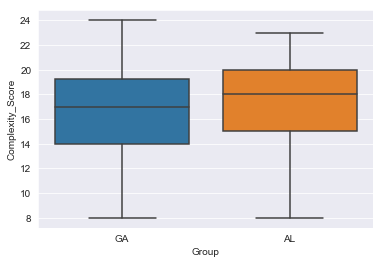

In [12]:
ax = sns.boxplot(x="Group", y="Complexity_Score", data=y_no_outlier)

### Academic Lecture Video Analysis

count    320.000000
mean      17.012500
std        3.684225
min        7.000000
25%       15.000000
50%       18.000000
75%       20.000000
max       23.000000
Name: Complexity_Score, dtype: float64


Skewness: -0.550841
Kurtosis: -0.487282


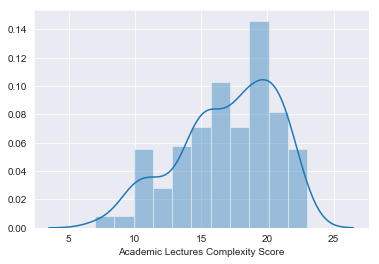

In [40]:
print (y_AL.describe())
#  plotting y distribution
x = pd.Series(y_AL, name= "Academic Lectures Complexity Score")
sns.distplot(x)
print ("\n")
#skewness and kurtosis
print("Skewness: %f" % y_AL.skew())
print("Kurtosis: %f" % y_AL.kurt())

### Top 10  most difficult videos

In [82]:
y_no_outlier.nlargest(10, 'Complexity_Score')

,Code,Group,Complexity_Score
260,GA.261,GA,24
16,GA.17,GA,23
90,GA.91,GA,23
161,GA.162,GA,23
365,AL.46,AL,23
442,AL.123,AL,23
452,AL.133,AL,23
471,AL.152,AL,23
497,AL.178,AL,23
498,AL.179,AL,23


### Example of GA Difficult Video

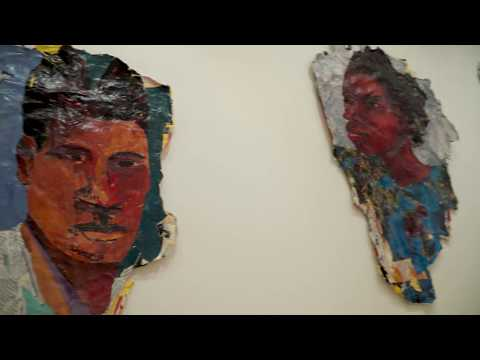

In [13]:
from IPython.display import YouTubeVideo
YouTubeVideo('I6BF0IJHmLs')

# %%HTML
# <iframe width="560" height="415" src="https://www.youtube.com/embed/I6BF0IJHmLs"></iframe>

### Example of Difficult AL video

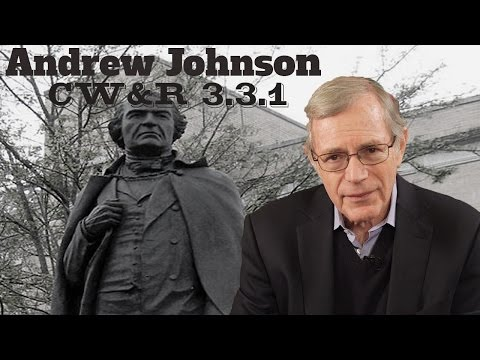

In [14]:
from IPython.display import YouTubeVideo
YouTubeVideo('WJxHJKCq9ew')

## Top 10  most easiest videos

In [88]:
 y_no_outlier.nsmallest(10, 'Complexity_Score')

,Code,Group,Complexity_Score
123,GA.124,GA,8
124,GA.125,GA,8
192,GA.193,GA,8
459,AL.140,AL,8
609,AL.290,AL,8
99,GA.100,GA,9
122,GA.123,GA,9
125,GA.126,GA,9
139,GA.140,GA,9
174,GA.175,GA,9


### Example of Easy GA Video

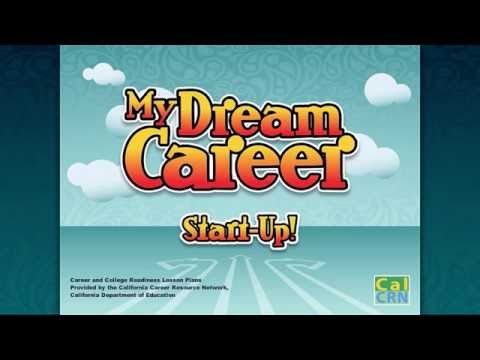

In [15]:
from IPython.display import YouTubeVideo
YouTubeVideo('-dLWrMjib5w')

### Example of Easy AL Video

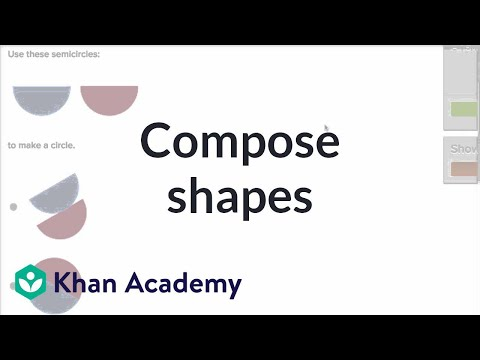

In [16]:
from IPython.display import YouTubeVideo
YouTubeVideo('K3GV13uokbk')